#  A examples of how to explain models trained by CompleteExperiment  

### Training a binary classification model using  HyperGBM

We use cross validation to split the data and train the model, since that we can choose any model to interpret.

In [1]:
from sklearn.model_selection import train_test_split

from hypergbm import make_experiment
from hypernets.tabular.datasets import dsutils
from hypernets.tabular.metrics import evaluate

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/wuhf/miniconda3/envs/hypergbm-dev/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(904, 17)","(904,)",None,None,None,binary(2)


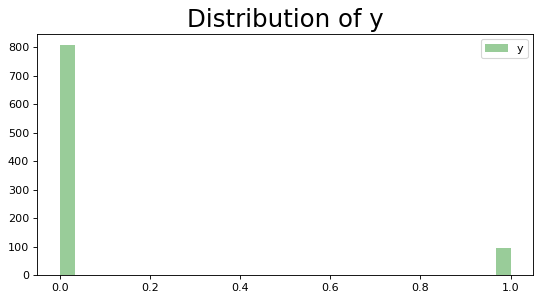

## Data Adaption

### Initliazed parameters

,key,value
0,memory_limit,0.05
1,min_cols,0.3
2,name,data_adaption
3,target,None


### Fitted parameters

,key,value
0,input_features,"[id, age, job, marital, education, default, ba..."
1,selected_features,"[id, age, job, marital, education, default, ba..."
2,unselected_features,[]


### Elapsed

* 0.005 seconds

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[id, age, job, marital, education, default, ba..."
1,selected_features,"[age, job, marital, education, default, balanc..."
2,unselected_features,[id]
3,X_train.shape,"(904, 16)"
4,y_train.shape,"(904,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{'id': 'idness'}
9,kept/dropped feature count,16/1


### Elapsed

* 0.019 seconds

## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Experiment Settings:

HyperGBM(searcher=EvolutionSearcher(space_fn=GeneralSearchSpaceGenerator(kwargs=None, n_estimators=200), population_size=30, sample_size=10, regularized=True, optimize_direction='max', random_state=RandomState(MT19937) at 0x7F52BA7ECC40), callbacks=[EarlyStoppingCallback(max_no_improvement_trials=10, mode='max', time_limit=3599.975010871887), NotebookCallback(), ProgressiveCallback(), FitCrossValidationCallback()], task='binary', discriminator=OncePercentileDiscriminator(percentile=50, history=TrialHistory(direction='max'), optimize_direction='max'))

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(904, 16)","(904,)",None,None,True,3,3,(skip_if_file)


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,3,0.893805,2,0.896018,3.321613,3,3


#### Best Trial:

key,value
signature,54e57250e8fc4f6e738335628f7175d5
vectors,"[1, 0, 1, 3, 2, 2, 0, 3, 4]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,mean
2-numeric_or_scaler_0.hp_or,1
3-Module_XGBoostEstimator_1.max_depth,10
4-Module_XGBoostEstimator_1.learning_rate,0.5
5-Module_XGBoostEstimator_1.gamma,1.5
6-Module_XGBoostEstimator_1.min_child_weight,1
7-Module_XGBoostEstimator_1.reg_alpha,1


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,2,0.896018,0.960858,"[1, 0, 1, 3, 2, 2, 0, 3, 4]"
1,3,0.893805,1.002773,"[0, 1, 3, 0, 20, 2, 3, 4, 1]"
2,1,0.835177,1.092000,"[0, 1, 1, 1, 170, 2, 3, 4, 4]"


search:   0%|          | 0/3 [00:00<?, ?it/s]

fit_cross_validation:   0%|          | 0/3 [00:00<?, ?it/s]

### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,best_reward,0.896018
2,history,"TrialHistory(direction='max', size=3, succeede..."


### Elapsed

* 3.345 seconds

## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0]"
1,scores,"[0.9413716814159292, 0.9413716814159292, 0.941..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


### Elapsed

* 2.409 seconds

Pipeline(steps=[('data_clean',
                 DataCleanStep(cv=True,
                               data_cleaner_args={'correct_object_dtype': True,
                                                  'drop_columns': None,
                                                  'drop_constant_columns': True,
                                                  'drop_duplicated_columns': False,
                                                  'drop_idness_columns': True,
                                                  'drop_label_nan_rows': True,
                                                  'int_convert_to': 'float',
                                                  'nan_chars': None,
                                                  'reduce_mem_usage': False,
                                                  'reserve_columns': None},
                               name='data_clean')),
                ('est...
                 GreedyEnsemble(weight=[1.0, 0.0, 0.0], scores=[0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292]))])

In [2]:
df = dsutils.load_bank()
df_train, df_test = train_test_split(df, test_size=0.8, random_state=42)

experiment = make_experiment(df_train, target='y',
                             max_trials=3,
                             log_level='warn',
                             random_state=1234,
                             skip_if_file='/tmp/skip.tag')

pipeline = experiment.run()
pipeline

### Calculate shap value

In [3]:
pipeline.steps[-1][1].estimators

[HyperGBMEstimator(task=binary, reward_metric=accuracy, cv=True,
 data_pipeline: DataFrameMapper(df_out=True,
                 df_out_dtype_transforms=[(ColumnSelector(include:['object']),
                                           'int')],
                 features=[(ColumnSelector(include:['object', 'category', 'bool']),
                            Pipeline(steps=[('categorical_imputer_0',
                                             SafeSimpleImputer(strategy='constant')),
                                            ('categorical_label_encoder_0',
                                             MultiLabelEncoder())])),
                           (ColumnSelector(include:number, exclude:timedelta),
                            Pipeline(steps=[('numeric_imputer_0',
                                             FloatOutputImputer()),
                                            ('numeric_log_standard_scaler_0',
                                             LogStandardScaler())]))],
           

In [4]:
from hypergbm.experiment import PipelineSHAPExplainer
explainer = PipelineSHAPExplainer(pipeline, model_indexes=[0, 1])
explainer

08-01 10:53:10 W hypergbm.experiment.py 359 - Index of 1 is None 


In [5]:
values_list = explainer(df_test)
len(values_list)

2

### Use the waterfall chart to interpret a prediction result 

In [6]:
df_test.iloc[1]

id                  800
age                  50
job          management
marital         married
education      tertiary
default              no
balance            2881
housing              no
loan                 no
contact        cellular
day                   5
month               aug
duration            510
campaign              2
pdays                 2
previous              5
poutcome          other
y                    no
Name: 800, dtype: object

This sample is predicted to be positive，waterfall chart shows that the biggest contribution is `duration=510`, in other words, long talk time is an important factor that leads to the success of customers

In [7]:
shap_values = values_list[0][0]
len(shap_values)

3617

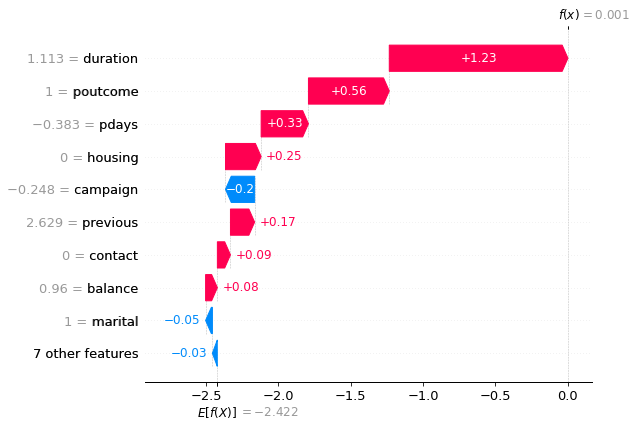

In [8]:
import shap
shap.plots.waterfall(shap_values[1])

#### Use beeswarm chart to get an overview of which features are most important for a model

This figure indicates that the most important feature is `duration`. Lhe long call duration has a strong impact on the positive prediction by the model.

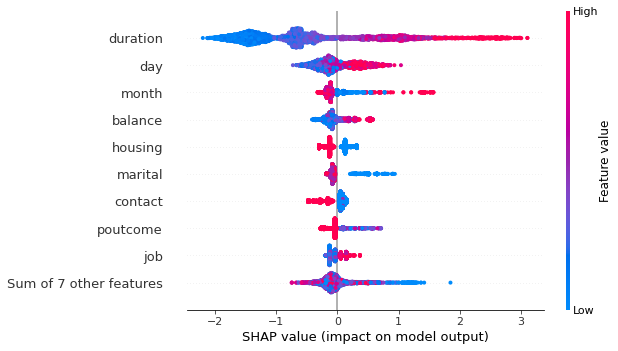

In [9]:
shap.plots.beeswarm(shap_values)

### Understand the interaction effects between 2 features using dependence scatter 

Customers with long talk time and small interval between campaigns are more likely to succeed in marketing

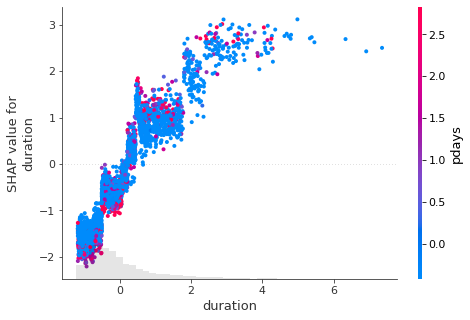

In [10]:
shap.plots.scatter(shap_values[:, "duration"], color=shap_values[:, "pdays"], show=True)